In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from fastai.vision.all import *
from fastai.vision import *
from sklearn.metrics import accuracy_score, roc_auc_score
import pandas as pd

In [2]:
DATASET_PATH = '/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages'
DATASET_PATH_Train = '/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Train_Color'
DATASET_PATH_Val = '/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Val_Color'
DATASET_PATH_Test = '/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Test_Color'

In [3]:
dls = ImageDataLoaders.from_folder(
    path=DATASET_PATH,
    train = 'Train',
    valid = 'Val',
    item_tfms=Resize(224),
    bs=16,
    batch_tfms=[Normalize.from_stats(*imagenet_stats), RandTransform()],
    device = 'cuda'
)

In [4]:
new_model = load_learner(f'{DATASET_PATH}/catdog_color_classifier_1.pkl')

1000


TensorBase(0.9940)


[0.012978407554328442, 0.9940000176429749, 0.006000000052154064]


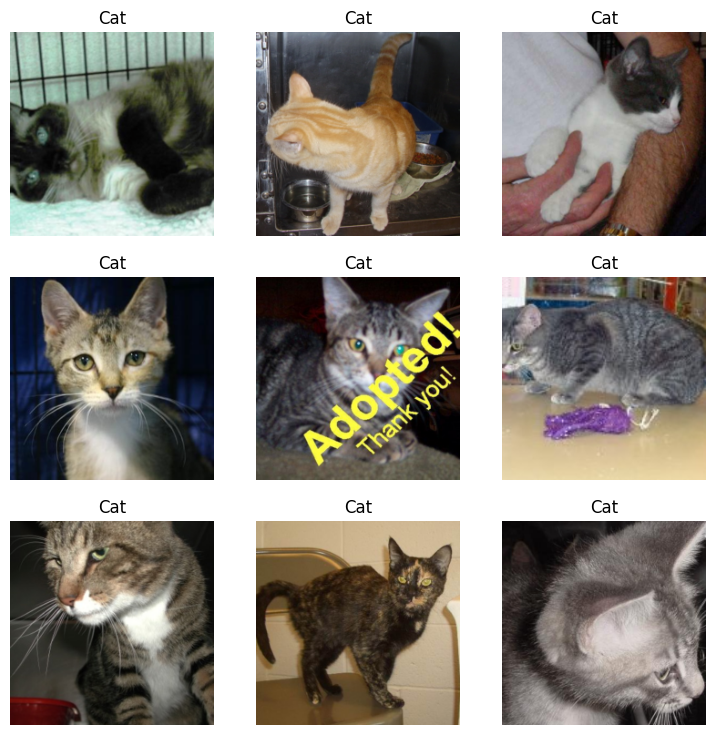

In [5]:
tst_files = get_image_files(DATASET_PATH_Test)
print(len(tst_files))
tst_dl = dls.test_dl(tst_files, with_labels=True)
tst_dl.show_batch(max_n=9)
preds, y = new_model.get_preds(dl=tst_dl)
acc = accuracy(preds, y)
print(acc)
acc2 = new_model.validate(dl=tst_dl)
print(acc2)

In [6]:
# Define a function to display images
def display_images(file_paths):
    plt.figure(figsize=(10, 5))
    for i, file_path in enumerate(file_paths):
        img = Image.open(file_path)
        plt.subplot(1, len(file_paths), i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(file_path.stem)  # Display file name as title
        plt.axis('off')
    plt.show()

In [7]:
# Get predictions and true labels
preds, true_labels = new_model.get_preds(dl=tst_dl)

# Convert predictions to class labels
predicted_labels = torch.argmax(preds, dim=1)

In [8]:
# Get indices of successes and failures for both classes
success_indices_class0 = (predicted_labels == 0) & (predicted_labels == true_labels)
failure_indices_class0 = (predicted_labels == 0) & (predicted_labels != true_labels)
success_indices_class1 = (predicted_labels == 1) & (predicted_labels == true_labels)
failure_indices_class1 = (predicted_labels == 1) & (predicted_labels != true_labels)

# Get file paths for successes and failures
success_files_class0 = [tst_files[i] for i, success in enumerate(success_indices_class0) if success]
failure_files_class0 = [tst_files[i] for i, failure in enumerate(failure_indices_class0) if failure]
success_files_class1 = [tst_files[i] for i, success in enumerate(success_indices_class1) if success]
failure_files_class1 = [tst_files[i] for i, failure in enumerate(failure_indices_class1) if failure]


Successes for class 0:
/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Test_Color/Cat/12000.jpg
/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Test_Color/Cat/12001.jpg
/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Test_Color/Cat/12002.jpg


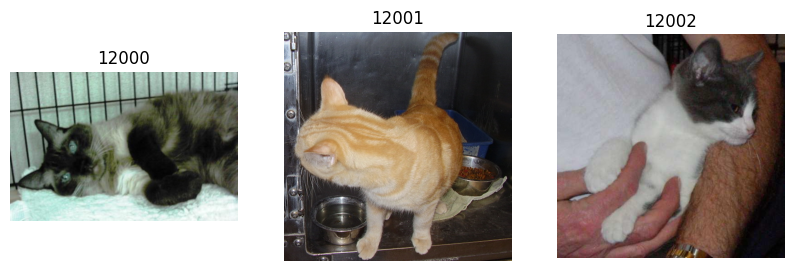


Failures for class 0:
/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Test_Color/Dog/12061.jpg
/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Test_Color/Dog/12223.jpg
/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Test_Color/Dog/12338.jpg


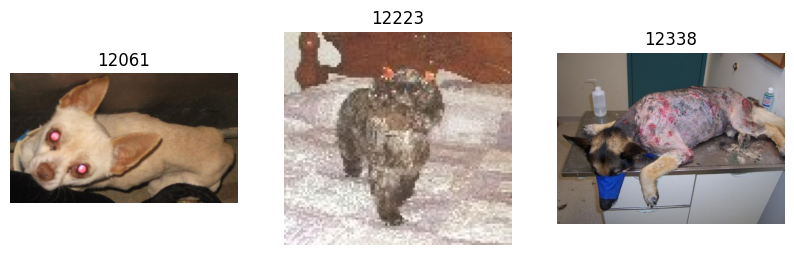


Successes for class 1:
/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Test_Color/Dog/12000.jpg
/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Test_Color/Dog/12001.jpg
/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Test_Color/Dog/12002.jpg


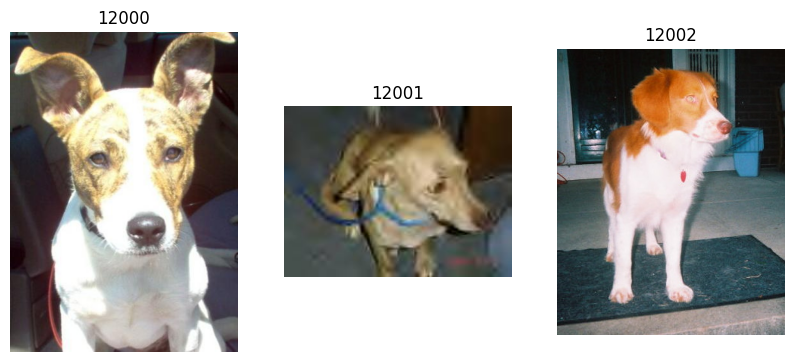


Failures for class 1:
/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Test_Color/Cat/12272.jpg
/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Test_Color/Cat/12378.jpg
/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Test_Color/Cat/12390.jpg


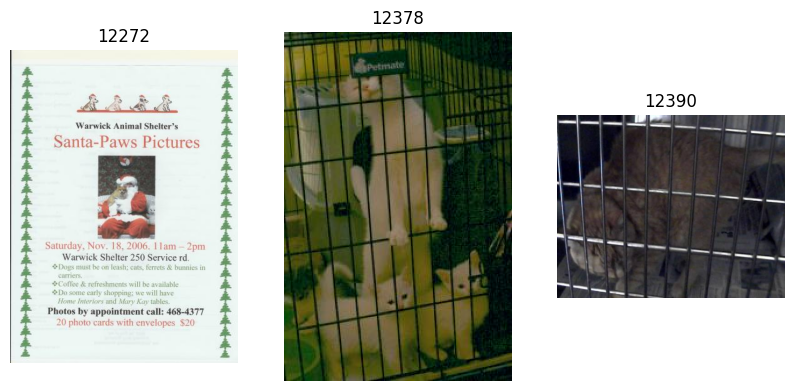

In [13]:
# Print successes and failures for both classes
print("Successes for class 0:")
for i in range(min(3, len(success_files_class0))):
    print(success_files_class0[i])
display_images(success_files_class0[:3])


print("\nFailures for class 0:")
for i in range(min(3, len(failure_files_class0))):
    print(failure_files_class0[i])
display_images(failure_files_class0[:3])


print("\nSuccesses for class 1:")
for i in range(min(3, len(success_files_class1))):
    print(success_files_class1[i])
display_images(success_files_class1[:3])


print("\nFailures for class 1:")
for i in range(min(3, len(failure_files_class1))):
    print(failure_files_class1[i])
display_images(failure_files_class1[:3])

In [6]:
preds_val, true_labels_val = new_model.get_preds(dl=dls.valid)


preds_pos = preds_val[:, 1]

# Compute ROC AUC
roc_auc = roc_auc_score(true_labels_val, preds_pos)
print(f'ROC AUC: {roc_auc}')

ROC AUC: 0.9995370741482966


In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(true_labels_val, preds_pos)

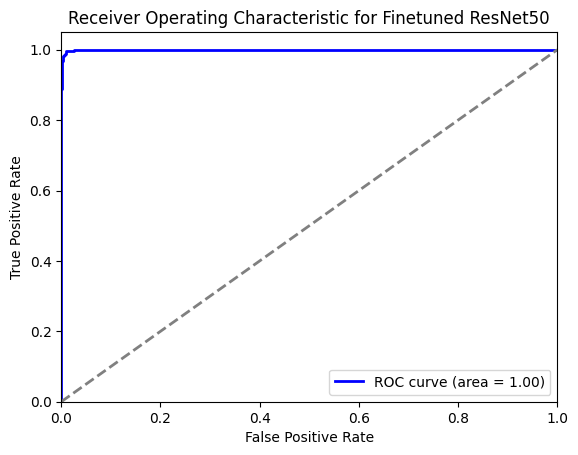

In [26]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Finetuned ResNet50')
plt.legend(loc='lower right')
plt.show()

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [20]:
y_pred_bin = [1 if prob > 0.5 else 0 for prob in preds_pos]

In [21]:
rncm = confusion_matrix(true_labels_val, y_pred_bin)

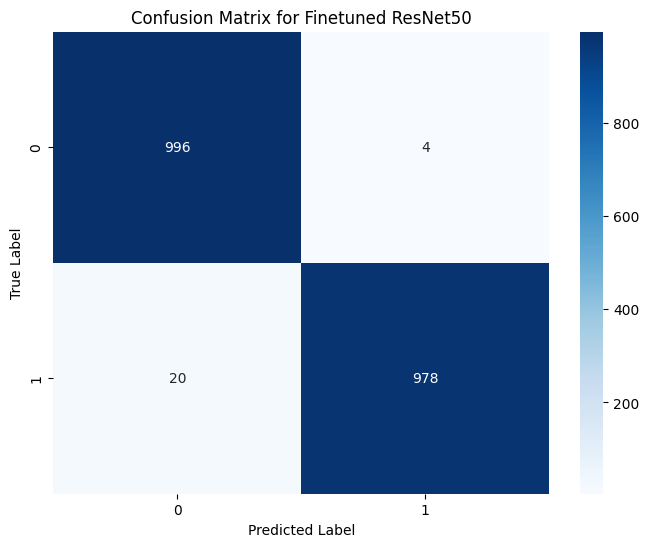

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(rncm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Finetuned ResNet50')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()